--- 
<strong> 
    <h1 align='center'>01 Read Clean & Validate </h1> 
</strong>

---

Clone the repository $\rightarrow$ __Exploratory Data Analysis in Python__

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 371, done.
remote: Counting objects: 100% (371/371), done.
remote: Compressing objects: 100% (320/320), done.
remote: Total 1742 (delta 103), reused 311 (delta 46), pack-reused 1371
Receiving objects: 100% (1742/1742), 177.75 MiB | 31.30 MiB/s, done.
Resolving deltas: 100% (595/595), done.
Checking out files: 100% (785/785), done.


__Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd) 

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset


In [3]:
ls

'Behavioral Risk Factor Surveillance System(brfss).hdf5'
'General Social Survey(gss).hdf5'
'National Survey of Family Growth(nsfg).hdf5'


## __Dataset__

The __National Survey of Family Growth (NSFG)__ gathers information on family life, marriage and divorce, pregnancy, infertility, use of contraception, and men’s and women’s health. The survey results are used by the U.S. Department of Health and Human Services and others to plan health services and health education programs, and to do statistical studies of families, fertility, and health. Links to some of those studies are included on this web site, under [“Publications and Information Products.”](https://www.cdc.gov/nchs/nsfg/nsfg_products.htm)



__Variables__

- __caseid__ is the integer ID of the respondent.

- __outcome__ is an integer code for the outcome of the pregnancy. The code 1 indicates a live birth.

- __birthwgt_lb__ and __birthwgt_oz__ contain the pounds and ounces parts of the birth weight of the baby.

- __prglngth__ is the integer duration of the pregnancy in weeks.

- __nbrnaliv__ records the number of babies born alive at the end of a pregnancy.

- __agepreg__ is the mother’s age at the end of the pregnancy.



## __01 - Read the codebook__


When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So, before we start coding, I want to make sure you are familiar with the NSFG codebook, which describes every variable.

- Type "birthweight" in the search field, UNSELECT the checkbox that says "Search variable name only", and press "Search". You should see a list of variables related to birthweight.

- Click on "BIRTHWGT_OZ1" and read the documentation of this variable. For your convenience, it is also displayed here:

<p align='center'>
  <a href="#">
    <img src='https://assets.datacamp.com/production/repositories/4025/datasets/0d2a0c18b63f3ddf056858c145a6bdc022d8656c/Screenshot%202019-03-31%2019.16.14.png' alt="Birthwgt_oz1.img">
  </a>
</p>

__How many respondents refused to answer this question?__

$\color{red}{\textbf{Ans:}}$ $1$

## __02 Exploring the NSFG data__
To get the number of rows and columns in a DataFrame, you can read its `shape` attribute.

To get the column names, you can read the `columns` attribute. The result is an Index, which is a Pandas data structure that is similar to a list. Let's begin exploring the NSFG data! It has been pre-loaded for you into a DataFrame called `nsfg`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
nsfg = pd.read_hdf('National Survey of Family Growth(nsfg).hdf5')
type(nsfg)

pandas.core.frame.DataFrame

In [6]:
# dataset head
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [7]:
# Display the number of rows and columns
nsfg.shape

(9358, 10)

In [8]:
# Display the names of the columns
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [9]:
# Select column birthwgt_oz1: ounces
ounces = nsfg['birthwgt_oz1']
type(ounces)

pandas.core.series.Series

In [10]:
# Print the first 5 elements of ounces
ounces.head(5)

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

Remember these attributes and methods; they are useful when you are exploring a new dataset. It's now time to check for errors and prepare the data for analysis.

## __03 Validate a variable__

In the NSFG dataset, the variable `'outcome'` encodes the outcome of each pregnancy as shown below:

|value|label|
|-----|-----|
|1	|Live birth|
|2	|Induced abortion|
|3	|Stillbirth|
|4	|Miscarriage|
|5	|Ectopic pregnancy|
|6	|Current pregnancy|

The `nsfg` DataFrame has been pre-loaded for you. Explore it in the IPython Shell and use the methods Allen showed you in the video to answer the following question:

__How many pregnancies in this dataset ended with a live birth?__

```python
dataframe.value_counts()
```

$\color{red}{\textbf{Ans:}}$ $6391$


In [11]:
nsfg.value_counts()

caseid  outcome  birthwgt_lb1  birthwgt_oz1  prglngth  nbrnaliv  agecon  agepreg  hpagelb  wgt2013_2015
70619   1        8.0           5.0           40        1.0       3683    3758.0   34.0     3856.253532     1
63669   1        7.0           12.0          40        1.0       3325    3400.0   25.0     4818.792839     1
63673   1        8.0           9.0           41        1.0       1908    1983.0   21.0     3699.618486     1
                               11.0          38        1.0       2458    2525.0   22.0     3699.618486     1
63677   1        7.0           6.0           39        1.0       1850    1925.0   21.0     3753.203203     1
                                                                                                          ..
67145   1        5.0           11.0          36        1.0       2816    2883.0   35.0     14838.496929    1
                 6.0           7.0           38        1.0       3183    3250.0   38.0     14838.496929    1
67148   1        6.0    

By comparing your results with the codebook, we can confirm that we are interpreting the data correctly.

## __04 Clean a variable__

In the NSFG dataset, the variable `'nbrnaliv'` records __the number of babies born alive__ at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that this value indicates that the respondent refused to answer the question.

```python
nsfg['nbrnaliv'].value_counts()
```
```
# Output
1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64
```

Our job in this exercise is to replace this value with `np.nan` using the `.replace()` method:

```python
ounces.replace([98, 99], np.nan, inplace=True)
```



__Instructions:__

- In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.

- Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [12]:
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [13]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace([8], np.nan, inplace=True)

# Print the values and their frequencies
print(nsfg['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


## __05 Compute a variable__

For each pregnancy in the NSFG dataset, the variable `'agecon'` encodes the respondent's __age at conception__, and `'agepreg'` the respondent's __age at the end of the pregnancy__.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.


__Instructions:__

- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.

- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.

- Use `.describe()` to compute the mean duration and other summary statistics.



In [14]:
# Select the columns and divide by 100
agecon = nsfg['agecon'] / 100
agepreg = nsfg['agepreg'] / 100

# Compute the difference
preg_length = agepreg - agecon

# Compute summary statistics
print(preg_length.describe())

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


## __06 Make a histogram__

Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable `'agecon'` that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the `bins` parameter that you saw in the video, and also a new parameter - `histtype`.

__Instructions__

- Plot a histogram of `agecon` with 20 bins.

- Adapt your code to make an unfilled histogram by setting the parameter `histtype` to be `'step'`.

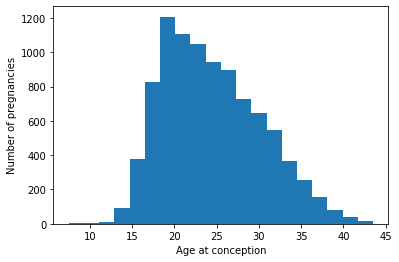

In [15]:
# Plot the histogram
plt.hist(agecon, bins=20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

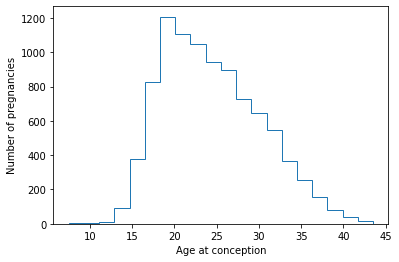

In [16]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

## __Validation__

One way to validate data is to compute basic statistics and compare them with published results. For example, the NSFG codebook includes tables that summarize each variable. Here is the table for outcome, which encodes the outcome of each pregnancy:

|value  |label               |Total|
|-------|--------------------|-----|
|1      |LIVE BIRTH          |6489|
|2      |INDUCED ABORTION    |947|
|3      |STILLBIRTH          |86|
|4      |MISCARRIAGE         |1468|
|5      |ECTOPIC PREGNANCY   |118|
|6      |CURRENT PREGNANCY   |249|

In [17]:
nsfg.outcome.value_counts().sort_index()

1    6489
2     947
3      86
4    1469
5     118
6     249
Name: outcome, dtype: int64

In [18]:
nsfg.birthwgt_lb1.value_counts(sort=False)

5.0      586
4.0      196
8.0     1168
6.0     1666
7.0     2146
3.0       67
10.0      82
1.0       34
12.0       7
2.0       47
14.0       2
0.0        6
98.0       1
17.0       1
99.0      94
9.0      363
11.0      17
13.0       2
Name: birthwgt_lb1, dtype: int64

The counts for 6, 7, and 8 pounds check out, and if you add up the counts for 0-5 and 9-95, they check out, too. But if you look more closely,you will notice errors in the data a 0.0, 99.0 & 98.0 pound baby!

In [19]:
clean_birthwgt_lb1 = nsfg['birthwgt_lb1'].replace([0, 98, 99], np.nan)
clean_birthwgt_lb1.value_counts(sort=False)

5.0      586
4.0      196
8.0     1168
6.0     1666
7.0     2146
3.0       67
10.0      82
1.0       34
12.0       7
2.0       47
14.0       2
17.0       1
9.0      363
11.0      17
13.0       2
Name: birthwgt_lb1, dtype: int64

## __07 Compute birth weight__

Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, `resample_rows_weighted`, that takes the NSFG data and resamples it using the sampling weights in `wgt2013_2015`. The result is a sample that is representative of the U.S. population.

Then I extract `birthwgt_lb1` and `birthwgt_oz1`, replace special codes with `NaN`, and compute total birth weight in pounds, `birth_weight`.

In [20]:
na_vals = [0, 98, 99]

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace(na_vals, np.nan)
ounces = nsfg['birthwgt_oz1'].replace(na_vals, np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

__Instructions__

- Make a Boolean Series called full_term that is true for babies with 'prglngth' greater than or equal to 37 weeks.

- Use full_term and birth_weight to select birth weight in pounds for full-term babies. Store the result in full_term_weight.

- Compute the mean weight of full-term babies.

In [21]:
# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]
print(full_term_weight)

# Compute the mean weight of full-term babies
print('Mean weight of full-term babies is {}'.format(full_term_weight.mean()))

0       5.2500
4       8.8125
9       8.6250
14      6.5000
15      5.5000
         ...  
9350    7.7500
9352       NaN
9354    8.4375
9356    8.1875
9357    8.3125
Length: 5616, dtype: float64
Mean weight of full-term babies is 7.383367875647669


## __08 Filter__

In the above exercise, we computed the __mean birth weight__ for __full-term babies__; we have filtered out preterm babies _because their distribution of weight is different_.

The distribution of weight is also different for multiple births, like twins and triplets. 

In this exercise, you'll filter them out, too, and see what effect it has on the mean.

__Instructions__

- Use the variable __'nbrnaliv'__ to make a Boolean Series that is __True__ for single births (where __'nbrnaliv'__ equals 1) and __False__ otherwise.

- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.

- For comparison, select multiple, full-term babies and compute their mean birth weight.

In [22]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[single & full_term]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[~single & full_term]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.396612515670706
Multiple full-term mean: 5.75801282051282


> The bitwise operator `~` (tilde) is a __Complement Operator__. It takes one bit operand and returns its complement. If the operand is 1, it returns 0, and if it is 0, it returns 1

<p align='center'>
    <a href="https://twitter.com/F4izy">
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px
            height=50px>
    </a>
    <a href="https://www.linkedin.com/in/mohd-faizy/">
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px>
    </a>
</p>